In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Glacier_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Glacier"]
Glacier_Cpx['Sample_ID_Cpx']="Glacier"

C:\Users\penny\AppData\Local\Temp\ipykernel_24644\3079542794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glacier_Cpx['Sample_ID_Cpx']="Glacier"


In [3]:
print(len(Glacier_Cpx))
WangCopy=Glacier_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Glacier_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

18


## Choose Crustal density

In [4]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


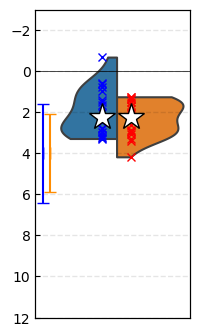

In [13]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Glacier', 'Glacier', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=[ "Glacier"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")]),  
         '*k', mfc='w', ms=20)

  

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.45, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('Glacier_Cpx.png', dpi=200)

In [6]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")]))

2.2161578645598343


In [7]:
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Glacier")]))

2.241851990049752


## No Amphibole

In [8]:
## Load in LP data

In [9]:
LPs=pd.read_excel(r'..\Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Glacier=LPs.loc[LPs['Volcano']=="Glacier Peak"]
LPs_Glacier

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
54,Glacier Peak,48.1119,10.100309,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
55,Glacier Peak,48.1119,19.498457,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
56,Glacier Peak,48.1119,21.496914,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
57,Glacier Peak,48.1119,20.470679,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
58,Glacier Peak,48.1119,20.254630,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
59,Glacier Peak,48.1119,16.959877,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
60,Glacier Peak,48.1119,16.581790,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN
61,Glacier Peak,48.1119,15.663580,"presume sea level based on their Fig. 7, which...",Nichols et al. 2011,NaN,NaN


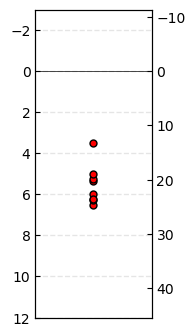

In [10]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(1.5,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=3.213 # Elevation of Glacier in Km


ax2.plot(1+0*LPs_Glacier['Depth'], LPs_Glacier['Depth']+elev, 'ok', mfc='red', ms=5)


ax1.plot([-1, 8], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([0, 2])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_Glacier.png', dpi=200, bbox_inches="tight")